# CE444: Geotechnical Design
Completed by Brandon Auyeung to Dr. Arash Khosravifar. Due on 6th of Febuary, 2026

## Problems 1 through 3 are to be completed on the text document.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import great_tables as gt

## Problem 4

PI = 40

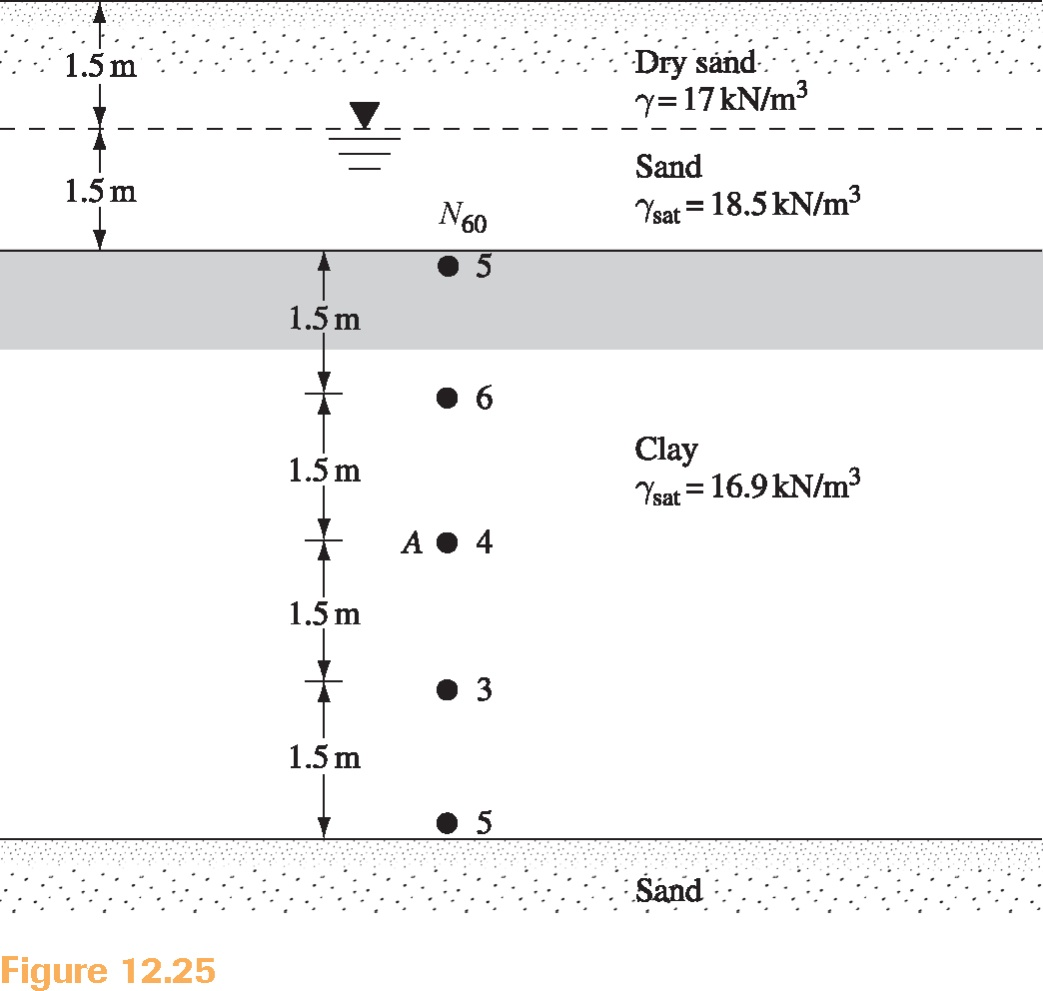

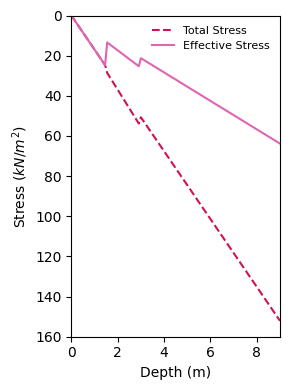

In [2]:
depth = np.linspace(0,9, 100) # m
gamma_drySand = 17 # kN/m^3
gamma_satSand = 18.5 # kN/m^3
gamma_clay = 16.9 # kN/m^3
gamma_w = 9.81 # kN/m^3

# total and effective stress
totStr = np.zeros(len(depth))
effStr = np.zeros(len(depth))

# calculate total and effective stresses
for i, z in enumerate(depth):
    if 0 <= z < 1.5:
        totStr[i] = gamma_drySand * z
        effStr[i] = totStr[i]
    elif 1.5 <= z < 3:
        totStr[i] = gamma_satSand * z
        effStr[i] = totStr[i] - gamma_w * z
    else:
        totStr[i] = gamma_clay * z
        effStr[i] = totStr[i] - gamma_w * z

# plot total and effective stresses
fig, ax = plt.subplots(figsize=(3,4), tight_layout=True)
plt.plot(depth, totStr, '--', color = "#ce1256" ,label="Total Stress")
plt.plot(depth, effStr, color = "#df65b0", label="Effective Stress")
plt.xlabel("Depth (m)")
plt.ylabel("Stress ($kN/m^2$)")

ax.set_xlim(0, 9)
ax.set_ylim(0, 160)
ax.yaxis.set_inverted(True)

plt.legend(frameon=False, loc='best', fontsize=8)
plt.show()

[18.45 22.14 14.76 11.07 18.45]


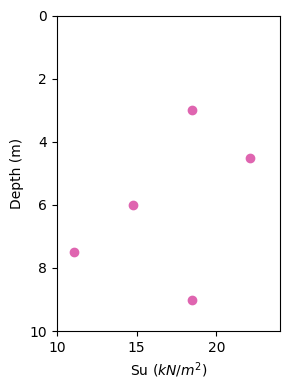

Mean and Standard Deviation of Su
16.974 3.763076401031475
minus 1 sigma , plus 1 sigma
13.210923598968526 20.737076401031477


In [17]:
# collect N60 values
N60_z3 = 5
N60_z3b6 = 6
N60_z6 = 4
N60_z6b9 = 3
N60_z9 = 5

# collect f1 graph ~ 0.045
f1 = 0.045
Pa = 100 # 1 atm = 100 kPa

Su = np.zeros(5)

Su[0] = 0.82*Pa*f1*N60_z3
Su[1] = 0.82*Pa*f1*N60_z3b6
Su[2] = 0.82*Pa*f1*N60_z6
Su[3] = 0.82*Pa*f1*N60_z6b9
Su[4] = 0.82*Pa*f1*N60_z9

depth_forSu = np.array([3, 4.5, 6, 7.5, 9])
print(Su)


# plot Su w.r.t. depth
fig, ax = plt.subplots(figsize=(3,4), tight_layout=True)
plt.plot(Su, depth_forSu, color = "#df65b0", label="Su", marker='o', linestyle='None')
plt.ylabel("Depth (m)")
plt.xlabel("Su ($kN/m^2$)")

ax.set_ylim(0, 10)
ax.yaxis.set_inverted(True)
ax.set_xlim(10, 24)
# plt.grid(True)
# plt.legend(frameon=False, loc='best', fontsize=8)
plt.show()

Su_mu = np.mean(Su)
Su_std = np.std(Su)
print("Mean and Standard Deviation of Su")
print(Su_mu, Su_std)
print("minus 1 sigma , plus 1 sigma")
print(Su_mu-Su_std, Su_mu+Su_std)

